# Team 4
                                                                           Savarala Chethana - BL.EN.U4AIE20059
                                                                      Sreevathsa Sree Charan - BL.EN.U4AIE20062
                                                                             Vemula Srihitha - BL.EN.U4AIE20072

### Importing required libraries

In [1]:
import keras,os
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.regularizers import l2
import tensorflow as tf
import cv2
from keras import optimizers
from distutils.dir_util import copy_tree, remove_tree
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras.backend as K
from sklearn.model_selection import train_test_split
import warnings 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

### Preprocessing 

In [2]:
train_dir = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train"
test_dir = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15,rotation_range=20,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen  = ImageDataGenerator(rescale = 1./255)

In [3]:
train_dataset  = train_datagen.flow_from_directory(directory = train_dir,target_size = (128,128),seed=1,
                                                   class_mode = 'categorical',subset = 'training',batch_size = 32)

Found 4355 images belonging to 4 classes.


In [4]:
valid_dataset = train_datagen.flow_from_directory(directory = train_dir,target_size = (128,128),seed=1,
                                                   class_mode = 'categorical',subset = 'validation',batch_size = 32)

Found 766 images belonging to 4 classes.


In [5]:
test_dataset = test_datagen.flow_from_directory(directory = test_dir,target_size = (128,128),seed=1,
                                                class_mode = 'categorical',batch_size = 16)

Found 1279 images belonging to 4 classes.


In [6]:
base_dir = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/"
root_dir = "./"
test_dir = base_dir + "test/"
train_dir = base_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)
    

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['NonDemented', 'VeryMildDemented', 'ModerateDemented', 'MildDemented']


In [7]:
WORK_DIR = './dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

In [8]:
zoomrange = [.9, 1.0]
brightness = [0.7, 1.3]

work_dr = ImageDataGenerator(rescale = 1./255, brightness_range=brightness, zoom_range=zoomrange, 
                             data_format="channels_last", fill_mode="constant", horizontal_flip=True)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=(128,128), 
                                             batch_size=6500, shuffle=False)

Found 6400 images belonging to 4 classes.


In [9]:
train_data_gen.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [10]:
train_data, train_labels = train_data_gen.next()

In [11]:
print(train_data.shape, train_labels.shape)

(6400, 128, 128, 3) (6400, 4)


In [12]:
valid_dataset = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 766 images belonging to 4 classes.


In [13]:
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, 128 * 128 * 3), train_labels)
train_data = train_data.reshape(-1, 128, 128, 3)
print(train_data.shape, train_labels.shape)

(12800, 128, 128, 3) (12800, 4)


In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.15, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

### Custom Model architecture 

In [ ]:
classifier = keras.models.load_model("Final_Model.h5")

classifier = Sequential()

classifier.add(Conv2D(32, (2, 2), input_shape = (128, 128, 3)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (2, 2)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (2, 2)))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(4))
classifier.add(Activation('softmax'))

In [16]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc')]
classifier.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=METRICS)

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 activation (Activation)     (None, 127, 127, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 activation_1 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                    

In [17]:
EPOCHS = 40
history1 = classifier.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=EPOCHS)

Epoch 1/100
272/272 [==============================] - 15s 17ms/step - loss: 1.1338 - acc: 0.4582 - val_loss: 0.7113 - val_acc: 0.6788
Epoch 2/100
272/272 [==============================] - 3s 13ms/step - loss: 0.7569 - acc: 0.6402 - val_loss: 0.6004 - val_acc: 0.7426
Epoch 3/100
272/272 [==============================] - 3s 13ms/step - loss: 0.6731 - acc: 0.6756 - val_loss: 0.5938 - val_acc: 0.7243
Epoch 4/100
272/272 [==============================] - 3s 13ms/step - loss: 0.6260 - acc: 0.7023 - val_loss: 0.5240 - val_acc: 0.7463
Epoch 5/100
272/272 [==============================] - 4s 14ms/step - loss: 0.5828 - acc: 0.7236 - val_loss: 0.4436 - val_acc: 0.8047
Epoch 6/100
272/272 [==============================] - 3s 13ms/step - loss: 0.5382 - acc: 0.7461 - val_loss: 0.4297 - val_acc: 0.8042
Epoch 7/100
272/272 [==============================] - 3s 13ms/step - loss: 0.4923 - acc: 0.7641 - val_loss: 0.3943 - val_acc: 0.8212
Epoch 8/100
272/272 [==============================] - 4s 15m

##### Plots

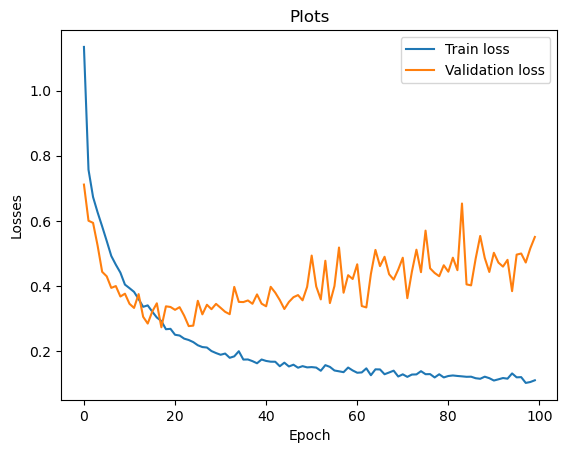

In [19]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Plots')
plt.ylabel('Losses')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plt.show()

##### Prediction

In [20]:
from tensorflow.keras.utils import img_to_array,load_img
def read_image(file_path):
    print("[INFO] loading and preprocessing image…") 
    image = load_img(file_path, target_size=(128,128,1)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0) 
    return image

In [21]:
def predict_proba(number):
    return [number[0],1-number[0]]

In [22]:
import time
def test_single_image(path):
    labels = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = classifier.predict(images) 
    preds = predict_proba(bt_prediction)
    for idx, label, x in zip(range(0,6), labels , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, label, np.round(x*100,2) ))
    
    return load_img(path)

[INFO] loading and preprocessing image…
1/1 [==============================] - 0s 19ms/step
ID: 0, Label: MildDemented 0.0%
ID: 1, Label: ModerateDemented 100.0%
ID: 2, Label: NonDemented 0.0%
ID: 3, Label: VeryMildDemented 0.0%


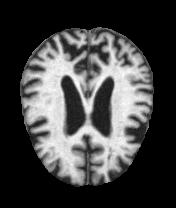

In [68]:
path = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg"
test_single_image(path)

In [69]:
###### y_pred_probs = classifier.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1) 
y_true = np.argmax(test_labels, axis=1)

precision = precision_score(y_true, y_pred, average='macro') 
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}")

Precision: 0.911, Recall: 0.913, F1-score: 0.911


##### GradCAM

In [71]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt 

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        
        for layer in reversed(self.model.layers):
           
            if len(layer.output_shape) == 4:
                return layer.name
        
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        
        with tf.GradientTape() as tape:
            
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        
        grads = tape.gradient(loss, convOutputs)

        
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
       
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # error here...
        
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
    
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
       
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5, colormap = cv2.COLORMAP_TWILIGHT_SHIFTED ):
        print("Overlay_heatmap")
        print("Image")
        print(image.shape)
        print("Heatmap")
        print(heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap, colormap)
        print("Heatmap")
        #heatmap = cv2.resize(heatmap, (128, 128, 1), interpolation = cv2.INTER_AREA)
        print(heatmap.shape)
        heatmap = np.expand_dims(heatmap, axis = 0)
        print("Heatmap")
        print(heatmap.shape)
        #output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        
        return heatmap

In [72]:
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/26 (64).jpg', target_size = (128,128))
test_image = tf.image.rgb_to_grayscale(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
print(test_image.shape)
test_image = np.expand_dims(test_image, axis = 0)

(128, 128, 1)


In [28]:
image = cv2.imread('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/NonDemented/26 (64).jpg')
image = cv2.resize(image, (128, 128))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)

preds = classifier.predict(image)
i = np.argmax(preds[0])

1/1 [==============================] - 0s 21ms/step


In [29]:
icam = GradCAM(classifier, i) 

heatmap = icam.compute_heatmap(image)
print("Heatmap")
print(heatmap.shape)
print("Image")
print(image.shape)
image = np.expand_dims(image, axis = 0)
print("Image")
print(image.shape)
heatmap = icam.overlay_heatmap(heatmap, image, alpha = 0.5)

Heatmap
(128, 128)
Image
(1, 128, 128, 3)
Image
(1, 1, 128, 128, 3)
Overlay_heatmap
Image
(1, 1, 128, 128, 3)
Heatmap
(128, 128)
Heatmap
(128, 128, 3)
Heatmap
(1, 128, 128, 3)


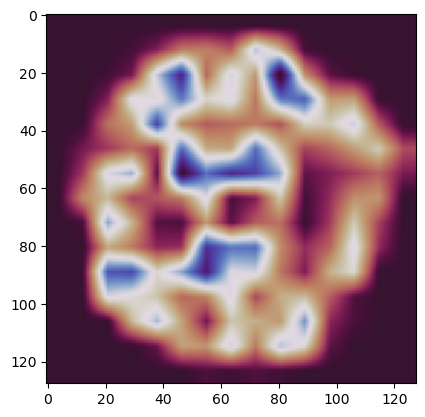

In [30]:
plt.imshow(heatmap[0])
plt.show()

In [31]:
classifier.save("Final_Model.h5", include_optimizer = True)